In [10]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# 이미지 파일의 경우을 사용하세요.:
IMAGE_FILES = ["C:/Users/kihoon/Desktop/AI/skin_care/data_last/botox_with_bunny_line/after/image_84.jpg"
]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # 작업 전에 BGR 이미지를 RGB로 변환합니다.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # 이미지에 출력하고 그 위에 얼굴 그물망 경계점을 그립니다.
        if not results.multi_face_landmarks:
            print("NO FACE?")
            continue
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            print('face_landmarks:', face_landmarks)
            # print(face_landmarks)
            print(len(face_landmarks.landmark))
            # face_landmarks.landmark = face_landmarks.landmark[100:200]
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())
        cv2.imwrite('./image' +
                    str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.49231454730033875
  y: 0.7064360976219177
  z: -0.08373188227415085
}
landmark {
  x: 0.49131959676742554
  y: 0.6251841187477112
  z: -0.20589418709278107
}
landmark {
  x: 0.49125611782073975
  y: 0.643826425075531
  z: -0.09604398161172867
}
landmark {
  x: 0.4569905400276184
  y: 0.5328627824783325
  z: -0.17271549999713898
}
landmark {
  x: 0.4909934103488922
  y: 0.5986989140510559
  z: -0.22469569742679596
}
landmark {
  x: 0.49037033319473267
  y: 0.56114262342453
  z: -0.21638569235801697
}
landmark {
  x: 0.4893701672554016
  y: 0.46772730350494385
  z: -0.13387471437454224
}
landmark {
  x: 0.22315651178359985
  y: 0.44994908571243286
  z: 0.021687576547265053
}
landmark {
  x: 0.4889485239982605
  y: 0.4040173888206482
  z: -0.1251475214958191
}
landmark {
  x: 0.4890226721763611
  y: 0.3694210648536682
  z: -0.14403130114078522
}
landmark {
  x: 0.49041175842285156
  y: 0.2267729938030243
  z: -0.13449755311012268
}
landmark {
  x: 0.49274

In [11]:
def draw(img,x,y,width):
    x1,y1,x2,y2 = x-width,y-width,x+width,y+width
    img = cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0),-1)
    return img
def draw_circle(img,x,y,width):
    img = cv2.circle(img,(x,y),10,(255,0,0),-1)
    return img
def draw_gray(img,x,y,width):
    x1,y1,x2,y2 = x-width,y-width,x+width,y+width
    img = cv2.rectangle(img,(x1,y1),(x2,y2),255,-1)
    return img


In [12]:
key = dict()
key = {0:[35,226,31,228,229,230,231,232,233,244,245,128,121,120,119,118,117,117,111,143,265,446,261,228,229,450,451,452,453,464,341,256,252,253,254,339,255,359],1: [92,165,167,164,393,391,322],
       2 : [61, 185, 40, 39, 37, 0, 267, 270,146, 91,72,
            73,74,74,183,62,
            96,77,80,180,85,15,316,403,
            319,325,307,406,304,303,302,
            181, 84, 17, 314, 405, 321],
       3 : [103,104,105,63,70,71,139,68
            ,34,116,156,143,116,227
            ,234,127,162,21,54,332,
            284,251,389,264,356,447,
            345,340,265.353,383,301,298,333],
       4 : [57,212,214,135,136,150,149,
            176,148,152,377,400,378,379,
            365,397,434,432,287,273,335,
            406,313,18,83,182,106,43,210,
            169,211,170,194,32,140,201,204,
            208,171,18,200,199,175,421,
            428,396,406,418,262,369,424,430,
            431,395,422,430,394,434,364],
          5 : [31,228,229,230,231,232,128,188,174,217,126,142,203,206,216,212,214,
               135,172,138,58,192,215,213,132,177,147,187,205,50,118,117,123,147,137,93,177,132,234,227,116,111,31,228,118,119,120,101,100,36,
               123,453,452,451,450,347,346,352,345,447,454,366,323,376,401,361,433,435,288,367,434,432,
               287,410,436,427,411,425,426,266,330,280,347,329,371,277,350,364],
          6 : [36,64,205,207,214,135,169,210,
               212,57,186,92,206,203,216,212,214,
                    294,266,425,427,434,394,364,436,426,322,
                    430,422,287,410,426,423,432],
          7:[],
          # 8a
          8.1:[123,147,213,192,214,135,136,150,169,
               172,138,58,215,132,177,137,227,234,

               447,352,454,352,366,323,376,401,361,433,416,434,364,
               379,365,397,288,435],
          #     ],
          # 8b
          8.2:[162,139,156,124,113,247,130,226,234,116,111,35,247,130,25,228,117,143,127,
               359,446,265,372,264,356,447,454,345,340,346,448,261,225,342,353,383,368,389],
          #8c
          8.3:[21,54,103,67,109,10,338,297,332,284,251,389,383,293,334,296,336,9,107,66,105,63,
               70,139,162,71,68,104,69,108,151,337,299,333,298,301],
          #8d
          8.4:[69,108,151,337,299,296,295,441,413,417,168,193,
               221,65,66,9,336,285,8,55,107],
          #8e
          8.5:[57,186,165,167,164,393,391,322,410,287,273,335,406,313,18,83,182,106,43],
          #8f
          8.6:[193,122,236,198,209,142,126,217,114,188,
               245,244,233,121,47,100,120,231,121,128,
               417,413,464,412,357,343,248,399,343,
               350,281,456,437,277,349,420,429,371],
          #8g
          8.9:[
               106,204,211,170,149,
               176,148,152,377,400,182,194,32,140,
               83,201,208,171,18,200,199,175,313,421,428,396,
               406,418,262,369,424,431,395],
               # ],
          
          9:[9,8,168,6,197,195,5,4,1,19,44,237,220,
               115,48,209,131,134,51,3,196,122,193,115,
               55,285,417,351,419,248,281,275,274,440,344,351,
               278,279,429,420,456,399,419,465
               ]
}
key[7] = [x for x in range(456) if x not in key[6] + key[8.3] + key[2]+key[0]]

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh
import numpy as np
# 이미지 파일의 경우을 사용하세요.:
IMAGE_FILES = ["C:/Users/kihoon/Desktop/AI/skin_care/data_last/botox_with_bunny_line/after/image_89.jpg"
]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
for j in key:
    idx_list = key[j]
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=1,
            refine_landmarks=True,
            min_detection_confidence=0.5) as face_mesh:
        for idx, file in enumerate(IMAGE_FILES):
                image = cv2.imread(file)
                h, w, c = image.shape
                gray_image = np.zeros((h,w),dtype=np.uint8)
                # 작업 전에 BGR 이미지를 RGB로 변환합니다.
                results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                # 이미지에 출력하고 그 위에 얼굴 그물망 경계점을 그립니다.
                if not results.multi_face_landmarks:
                    print("NO FACE?")
                    continue
                annotated_image = image.copy()
                for face_landmarks in results.multi_face_landmarks:
                    print('face_landmarks:', face_landmarks)
                    # print(face_landmarks)
                    for idx,landmark in enumerate(face_landmarks.landmark):
                        if idx in idx_list:
                            draw(annotated_image,int(landmark.x*w),int(landmark.y*h),10)
                            draw_gray(gray_image,int(landmark.x*w),int(landmark.y*h),10)
                
                cv2.imwrite('./image' +
                            str(j) + '.png', annotated_image)
                cv2.imwrite('./image' +
                            str(j+10) + '.png', gray_image)

face_landmarks: landmark {
  x: 0.505291759967804
  y: 0.6567316055297852
  z: -0.11741206049919128
}
landmark {
  x: 0.503369927406311
  y: 0.5753375291824341
  z: -0.22083793580532074
}
landmark {
  x: 0.5027787685394287
  y: 0.5976226329803467
  z: -0.1149749681353569
}
landmark {
  x: 0.46855348348617554
  y: 0.49808675050735474
  z: -0.16655048727989197
}
landmark {
  x: 0.5036659240722656
  y: 0.5514088273048401
  z: -0.23540638387203217
}
landmark {
  x: 0.5035466551780701
  y: 0.5202655792236328
  z: -0.21933172643184662
}
landmark {
  x: 0.5033024549484253
  y: 0.44584304094314575
  z: -0.11027274280786514
}
landmark {
  x: 0.21348145604133606
  y: 0.43997514247894287
  z: 0.056129101663827896
}
landmark {
  x: 0.502942681312561
  y: 0.39116743206977844
  z: -0.08592461049556732
}
landmark {
  x: 0.5030478835105896
  y: 0.3606197237968445
  z: -0.09620077908039093
}
landmark {
  x: 0.5048640966415405
  y: 0.24237409234046936
  z: -0.05250280722975731
}
landmark {
  x: 0.505005

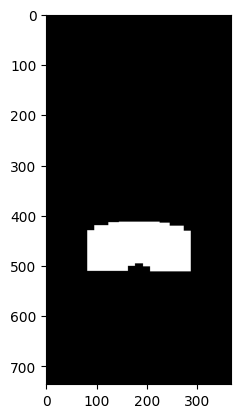

In [16]:
import matplotlib.pyplot as plt
img= cv2.imread('image11.png')

plt.imshow(img)